# COVID-19 

In this notebook we will go through the developments around the COVID-19 virus infections. First we look at the developments worldwide and finally EU only.

The dataset which I use in this project is provided by the [`European Centre for Disease Prevention and Control (ECDC)`](https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases)

* Author: Erfan Nariman
* Date: 10-03-2020
* GitHub: [erfannariman](github.com/ErfPy)

---

In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

---

### data import

In [2]:
df = pd.read_excel(os.path.join('..', 'data', 'COVID-19-geographic-disbtribution-worldwide-2020-03-11.xls'))

df.shape

(4729, 7)

### data cleaning

In [3]:
# we filter out China to get rid of the extreme values
df = df[df['CountryExp'].ne('China')]

# clean up column names
df.columns = df.columns.str.replace('DateRep', 'Date').str.replace('CountryExp', 'Country')

# convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# replace name to Japan
df['Country'] = df['Country'].str.replace('Cases on an international conveyance Japan', 'Japan')

# print first 5 rows of dataframe
df.head()

,Date,Country,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,0,0,AF,NaN,Non-EU/EEA
1,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
3,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA


### exploratory data analysis (EDA)

In [4]:
# range of data in days
df['Date'].max() - df['Date'].min()

Timedelta('71 days 00:00:00')

In [5]:
# checking for missing days by resampling and checking for NaN
df.set_index('Date').resample('D').mean().isna().sum()

NewConfCases    0
NewDeaths       0
dtype: int64

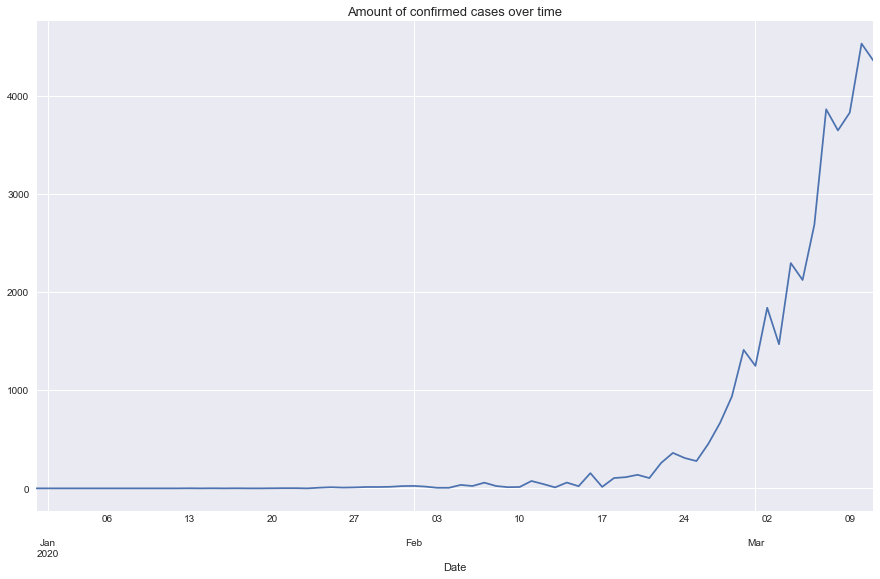

In [6]:
cases_sum = df.groupby('Date')['NewConfCases'].sum()
cases_sum.plot(figsize=(15,9))
plt.title('Amount of confirmed cases over time', size=13)
plt.savefig('../plots/plt1.png', dpi=100)
plt.show()

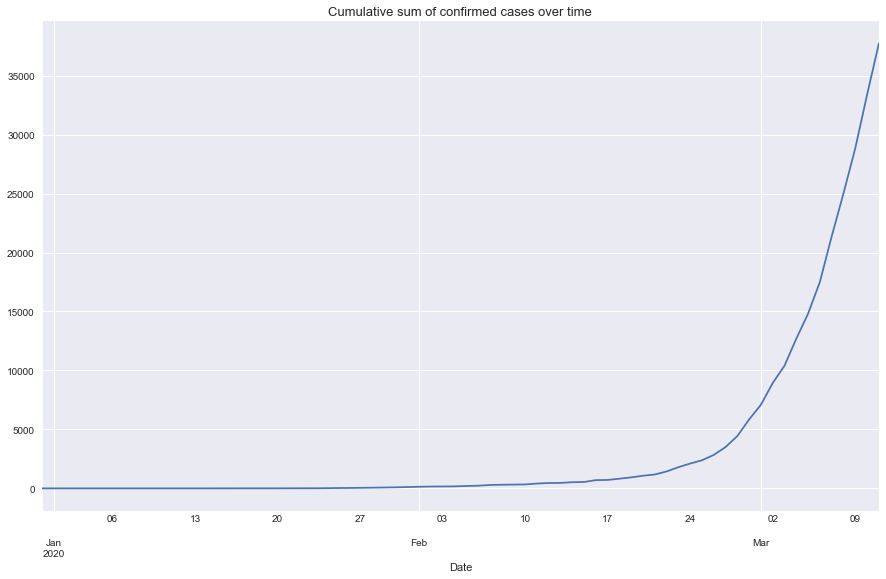

In [7]:
cases_cumsum = cases_sum.cumsum()
cases_cumsum.plot(figsize=(15,9))
plt.title('Cumulative sum of confirmed cases over time', size=13)
plt.savefig('../plots/plt2.png')
plt.show()

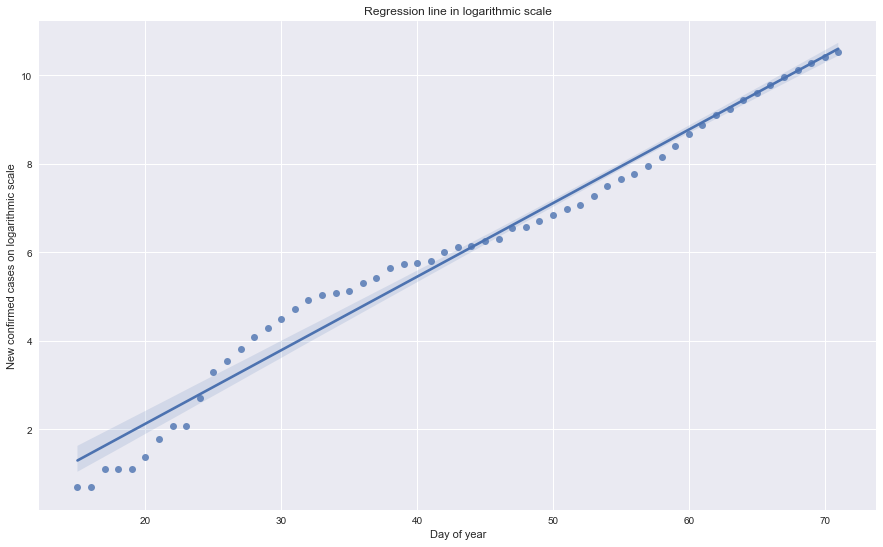

In [8]:
log_cumsum = np.log(cases_cumsum[cases_cumsum.gt(1)]).to_frame().reset_index()
log_cumsum['Date'] = log_cumsum['Date'].dt.dayofyear

plt.figure(figsize=(15,9))
plt.title("Regression line in logarithmic scale")
sns.regplot(x='Date', y='NewConfCases', data=log_cumsum)
plt.xlabel('Day of year')
plt.ylabel('New confirmed cases on logarithmic scale')
plt.savefig('../plots/plt3.png')
plt.show()

In [9]:
X = log_cumsum['Date']
y = log_cumsum['NewConfCases']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           NewConfCases   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              6583.
Date:                Wed, 11 Mar 2020   Prob (F-statistic):                    9.09e-60
Time:                        14:29:09   Log-Likelihood:                         -52.002
No. Observations:                  57   AIC:                                      106.0
Df Residuals:                      56   BIC:                                      108.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Date           0.1419      0.002     81.134      0.000       0.138       0.145
==============================================================================
Omnibus:                       14.112   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.855
Skew:                          -1.265   Prob(JB):                     0.000361
Kurtosis:                       3.527   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

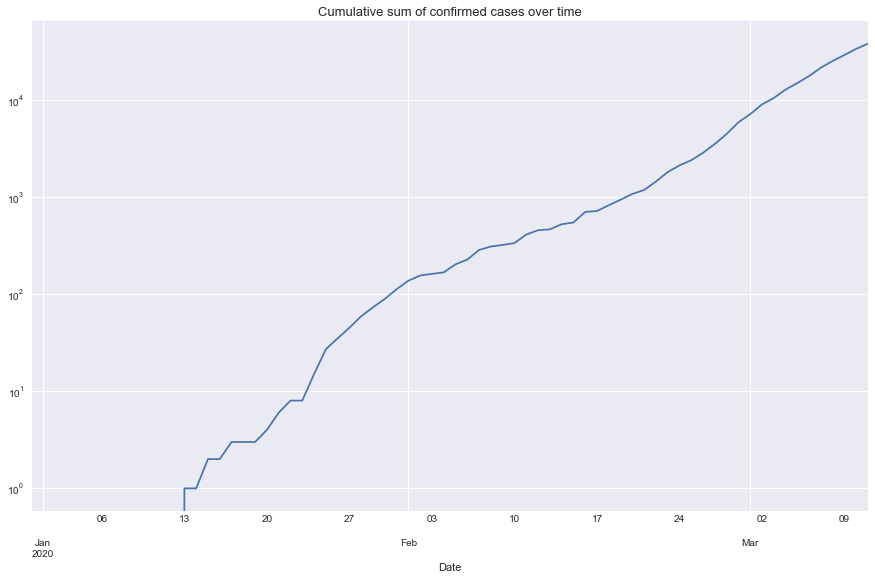

In [10]:
cases_cumsum.plot(figsize=(15,9), logy=True)
plt.title('Cumulative sum of confirmed cases over time', size=13)
plt.savefig('../plots/plt4.png')
plt.show()

In [11]:
df.groupby('Date')['NewConfCases'].sum().sort_values(ascending=False)

Date
2020-03-10    4529
2020-03-11    4356
2020-03-07    3860
2020-03-09    3826
2020-03-08    3645
              ... 
2020-01-14       0
2020-01-16       0
2020-01-18       0
2020-01-19       0
2019-12-31       0
Name: NewConfCases, Length: 72, dtype: int64

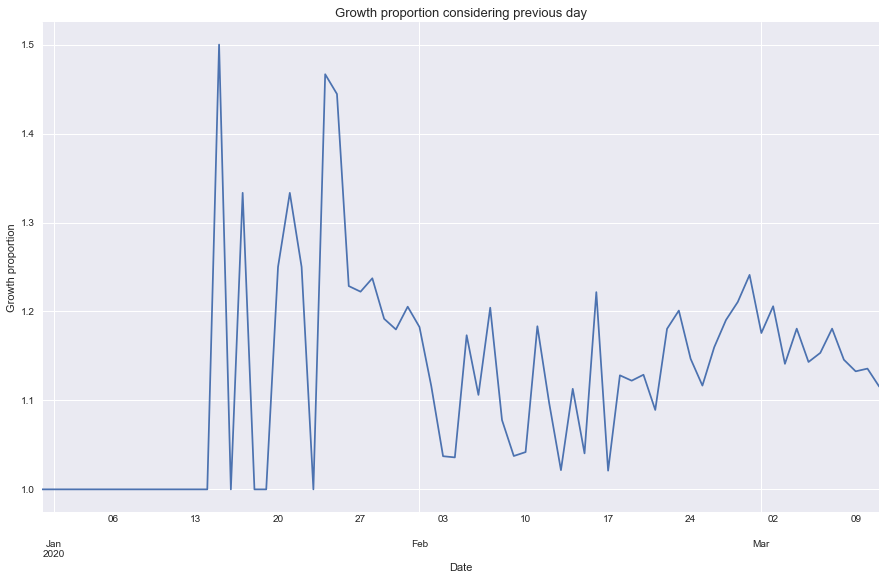

In [12]:
cases_cumsum = cases_cumsum.replace(0, 1)
cases_cumsum.diff().div(cases_cumsum).add(1).fillna(1).plot(figsize=(15,9))
plt.title('Growth proportion considering previous day', size=13)
plt.ylabel('Growth proportion')
plt.savefig('../plots/plt5.png')
plt.show()

In [13]:
df.groupby('Country')['NewConfCases'].max().sort_values(ascending=False).head(15)

Country
Italy                       1797
Iran                        1234
South Korea                  909
Spain                        615
France                       410
Germany                      284
United States of America     271
Denmark                      151
Japan                        134
Switzerland                  122
Norway                        85
Sweden                        78
Netherlands                   77
United Kingdom                67
Belgium                       60
Name: NewConfCases, dtype: int64

In [14]:
df.groupby('Country')['NewConfCases'].sum().sort_values(ascending=False).head(15)

Country
Italy                       10149
Iran                         8042
South Korea                  7755
France                       1784
Spain                        1639
Germany                      1296
Japan                        1264
United States of America     1025
Switzerland                   490
Netherlands                   382
United Kingdom                373
Sweden                        326
Norway                        277
Belgium                       267
Denmark                       264
Name: NewConfCases, dtype: int64

### time series analysis

In [15]:
from itertools import product

p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

In [16]:
y = cases_cumsum
y.index = pd.DatetimeIndex(y.index.values,
                           freq=y.index.inferred_freq)

results_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            results_list.append((param, param_seasonal, results.aic))
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1492.8626132501254
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1252.7197721064078
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1238.6485331248477
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:979.7824053230489
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1020.2075328561959
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1001.5456263328042
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:839.3156443319344
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:822.0449815380657
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1421.8731005475393
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1182.1132828917694
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1177.5253918547537
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:938.0223581872218
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:980.0454062394963


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:953.2373090703863
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:808.2202732939811


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:780.4658037601018
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1199.6070781377382
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:998.3307970061061
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:990.1576915982055
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:792.2250647285381
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:914.5393847784246
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:902.0979103031153
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:741.412174549582
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:728.5679791494309
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1109.3378733041252
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:927.8081020356943
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:918.5389652659007
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:735.9395084515077
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:902.8070231061077
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:876.1951840597055
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:732.9148405013685


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:705.905488293409
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:982.09866419348
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:825.1758865926697


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:842.3886329651689
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:693.042104384323
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:800.3579967579234
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:798.4870212196447
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:659.0968177431844


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:653.9203531593624
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:962.6847610661633
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:807.7330020261452
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:823.1651325725111
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:662.1421075794252


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:796.1831222694009


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:785.6974916280046
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:660.8483960868911
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:647.3853277784232
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:957.6898724261574


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:805.8077689415662
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:814.3610253115883


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:659.847019274747
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:800.4410788153369
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:802.4109034732639
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:650.9751770418551
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:652.2939479668116
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:929.5004045529288
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:779.9243017737178
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:791.5955072404469
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:646.9040218043937
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:783.2566114606794


C:\Users\ErfanNarimanVeneficu\Anaconda3\envs\personal\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:797.6297823644464
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:639.4588167215013
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:633.3916156027756


In [17]:
min([aic for x, y, aic in results_list if aic > 0])

633.3916156027756

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1674      0.020     58.770      0.000       1.128       1.206
ma.L1         -1.1378      0.263     -4.325      0.000      -1.653      -0.622
ar.S.L12      -3.6839      1.283     -2.871      0.004      -6.199      -1.169
ma.S.L12      -0.3228      0.440     -0.733      0.463      -1.186       0.540
sigma2      5.793e+04   3.26e+04      1.777      0.076   -5966.956    1.22e+05


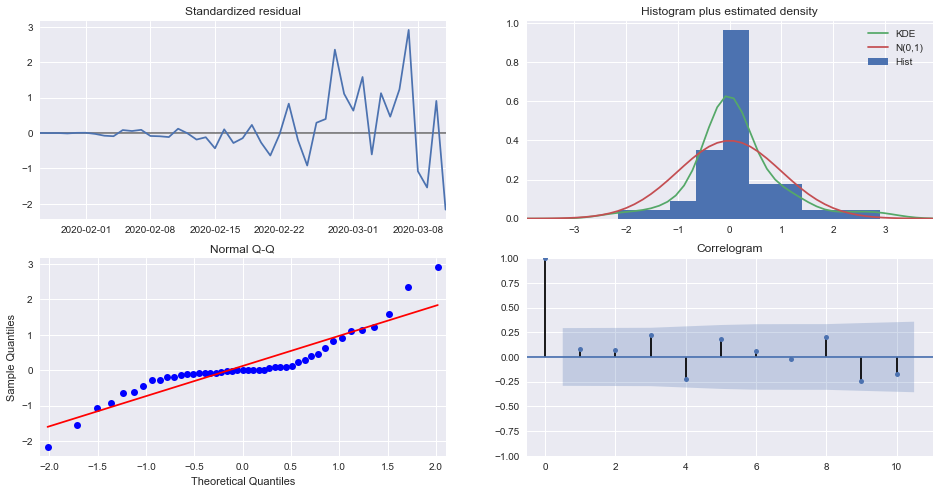

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('../plots/plt6.png')
plt.show()

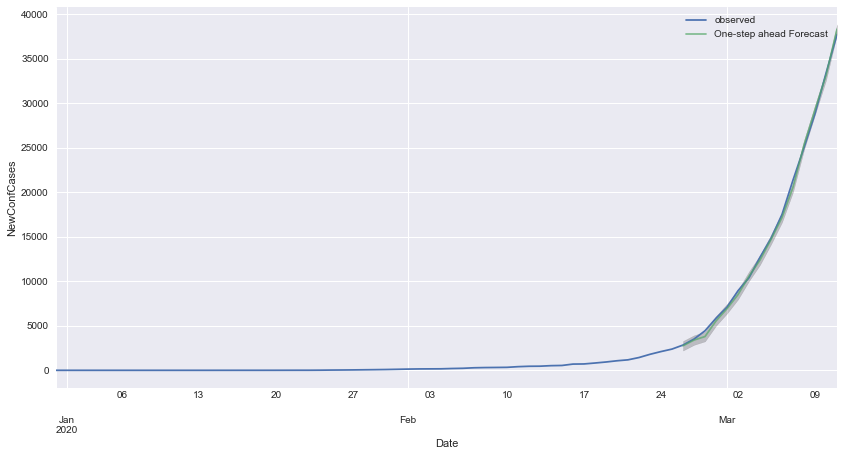

In [20]:
pred = results.get_prediction(start=(y.index.max() - pd.Timedelta(days=14)), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NewConfCases')
plt.legend()
plt.savefig('../plots/plt7.png')
plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y[(y.index.max() - pd.Timedelta(days=14)):]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 153986.89


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 392.41


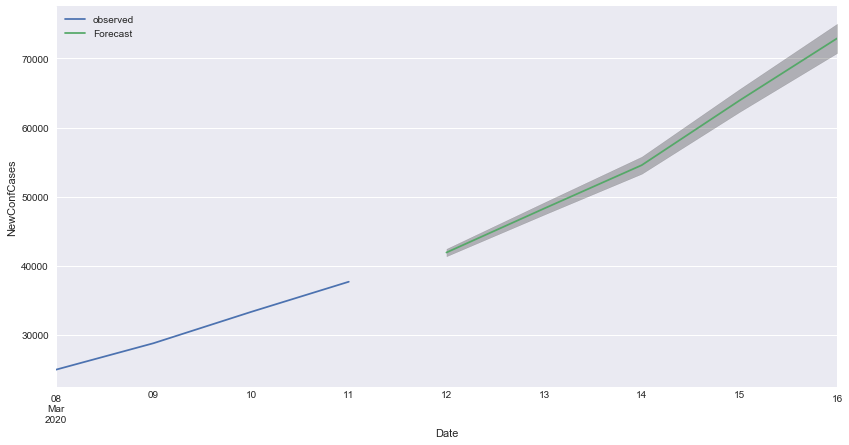

In [23]:
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()
ax = y[(y.index.max() - pd.Timedelta(days=3)):].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('NewConfCases')
plt.legend()

plt.savefig('../plots/plt8.png')
plt.show()

In [24]:
# TODO: check why theres a gap between forecast

---